In [7]:
import csv
import os
import pandas as pd
import pathlib as Path
import matplotlib.pyplot as plt

csvpath = os.path.join("..", "Sales_Data", "Sales_January_2019.csv")

### OPENING, READING, AND ITERATING THROUGH EACH ROW AND COLUMN TO SUM EACH ONE. INTEGERS ONLY.

In [8]:
# opens CSV file to read, csv.reader function is used to read the file, next() function is used to read the header.
with open('merged_file_totals.csv', 'r') as file:
    reader = csv.reader(file)

    # get the header row
    header = next(reader)

    # create a dictionary to store the column sums header [i] is the key and it's set to zero. for statement iterates through the range of numbers the length of the headers.
    column_sums = {header[i]: 0 for i in range(len(header))}

    # Iterates through each row using the reader function which is a function that iterates through rows
    for row in reader:
        # this is to iterates through the columns remember the range is the length of the row.
        for i in range(len(row)):
            # adds the totals of each column to columns headers
            column_sums[header[i]] += int(row[i])

for column, sum in column_sums.items():
    print(f'{column}: {sum}')

Quantity Ordered: 209038
Total: 34490742


### Merging Multiple Files Together for Analysis

In [9]:
# Create a variable with a list of the file names to be merged. Remember all headers need to be the same to work properly.
filenames = ['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 
            'Sales_April_2019.csv','Sales_May_2019.csv','Sales_June_2019.csv',
            'Sales_July_2019.csv','Sales_August_2019.csv','Sales_September_2019.csv',
            'Sales_October_2019.csv','Sales_November_2019.csv','Sales_December_2019.csv']

# Create an empty dataframe to store csv file
year_2019_df = pd.DataFrame()

# line one iterates through filenames. line 2 reads the csv file and line three adds it to a data frame. append data from each file
for filename in filenames:
    data = pd.read_csv(filename)
    year_2019_df = year_2019_df.append(data)

# basically creating a new file with the dataframe of your choice. Index False will remove the index and keep just the data.
year_2019_df.to_csv('merged_file_org.csv', index=False)



C:\Users\12626\AppData\Local\Temp\ipykernel_27632\459448863.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_2019_df = year_2019_df.append(data)
C:\Users\12626\AppData\Local\Temp\ipykernel_27632\459448863.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_2019_df = year_2019_df.append(data)
C:\Users\12626\AppData\Local\Temp\ipykernel_27632\459448863.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_2019_df = year_2019_df.append(data)
C:\Users\12626\AppData\Local\Temp\ipykernel_27632\459448863.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  year_2019_df = year_2019_df.append(data)
C:\Users\12626\AppData\Local

### Read in Merged Data Set

In [10]:
all_data = pd.read_csv('merged_file_org.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Cleaning data Drop Rows of NaN

In [15]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### Find 'Or' to solve this error (invalid literal for int() with base 10: 'Or')

In [18]:
# temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']
# temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


### Creating new Dataframe without the 'Or' value thats creating the error. 

In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### Converting columns to correct data type

In [22]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # converting to integer 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # converting to float

### Add additional columns (Month Column)

In [20]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] =all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Add additional columns (Sales Column)

In [23]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


### Add additional columns (Sales Column)

### Using the .apply method

In [38]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


### Using Groupby to determine best Month of sales

In [26]:
results = all_data.groupby('Month').sum()
results.head()

C:\Users\12626\AppData\Local\Temp\ipykernel_27632\1473778498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


### Charting Data 

<function matplotlib.pyplot.show(close=None, block=None)>

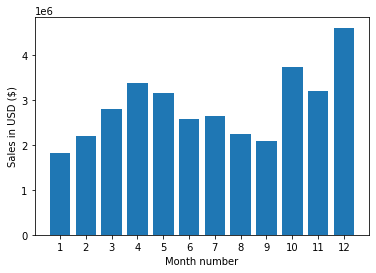

In [28]:
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show

### What City had the highest number of sales?

In [40]:
results = all_data.groupby('City').sum()
results

C:\Users\12626\AppData\Local\Temp\ipykernel_27632\2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


<function matplotlib.pyplot.show(close=None, block=None)>

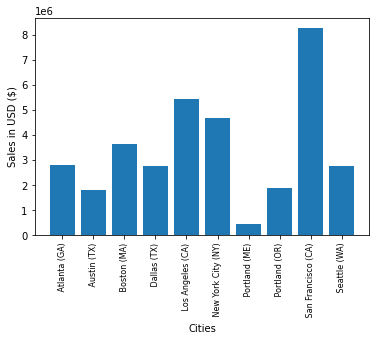

In [44]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show

### Identifying each indiviual entry in the State column and counting each one.

In [ ]:
state_list = merged_file_2019['City'].unique()
state_count = merged_file_2019['City'].value_counts()
print(state_list, state_count)

### What was the best month for sales? How much was earned that month?

### Cleaning Data with Python

In [ ]:
# Converted Dataframe to csv file
# new_all_2019.to_csv('new_all_2019.csv', index=False)

In [ ]:
# Converted csv file to Dataframe
# clean_all_2019 = pd.read_csv('clean_all_2019.csv')
# clean_all_2019.head()


In [ ]:
merged_file_2019['Time'] = merged_file_2019['Time'].astype('str')
merged_file_2019.head()

In [ ]:
print(merged_file_2019.dtypes)